In [1]:
import numpy as np
import seaborn as ans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import multivariate_normal as mn

%matplotlib inline

In [2]:
def bayes(mu, sigma, ratio, size=900):
    
    #number of classes
    N = len(mu)
    
    #create data
    X = []
    for i in range(N):
        nr = int(ratio[i]*size)
        temp = np.random.multivariate_normal(mu[i], sigma[i], nr)
        X.append(np.hstack((temp,np.ones((nr,1))*i)))
    X = np.vstack(X)
    
    #create meshgrid
    x1_min, x1_max = X[:, 0].min() - 4, X[:, 0].max() + 4
    x2_min, x2_max = X[:, 1].min() - 4, X[:, 1].max() + 4
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    x = np.array([xx1.ravel(), xx2.ravel()]).T
    
    
    #calculate posteriors
    P = []
    for i in range(N):
        # Likelihood (multivariate normal pdf) * Prior
        P.append(mn.pdf(x,mean=mu[i],cov=sigma[i]) * ratio[i])
        
    y = np.argmax(P, axis=0).reshape(xx1.shape)
    
    #plotting
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    plt.figure(figsize=(10,7))
    plt.contourf(xx1,xx2, y, alpha=0.3,cmap=cmap )
    plt.scatter(X[:,0],X[:,1], c=X[:,2], cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

# Exercise 5.4

### a) 
Two classes: 

$μ_0 =(0,0), Σ_0 = \begin{bmatrix}
    4  & 0  \\
    0 & 1   \\
\end{bmatrix}, μ_1 =(4,2), Σ_1 = \begin{bmatrix}
    4  & 0  \\
    0 & 1   \\
\end{bmatrix},P(y_0)=P(y_1)$

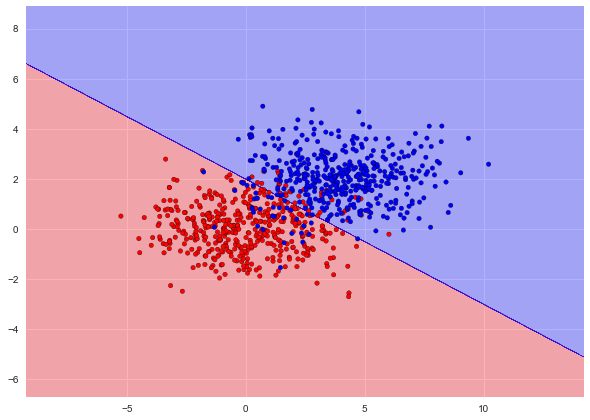

In [3]:
bayes([[0,0],[4,2]], [np.array([[4,0],[0,1]]),np.array([[4,0],[0,1]])], [0.5,0.5])

### b) 

Two classes: 

$μ_0 =(0,0), Σ_0 = \begin{bmatrix}
    4  & 0  \\
    0 & 1   \\
\end{bmatrix}, μ_1 =(4,2), Σ_1 = \begin{bmatrix}
    4  & 0  \\
    0 & 1   \\
\end{bmatrix},P(y_0)= 2 \cdot P(y_1)$

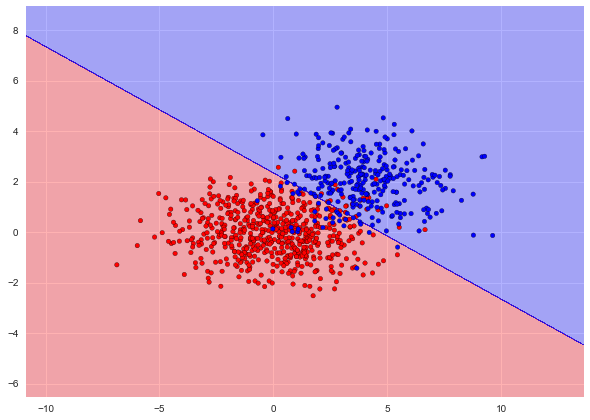

In [4]:
bayes([[0,0],[4,2]], [np.array([[4,0],[0,1]]),np.array([[4,0],[0,1]])], [2/3,1/3])

### c) 
Two classes:

$μ_0 =(0,0), Σ_0 = \begin{bmatrix}
    1  & 0  \\
    0 & 1   \\
\end{bmatrix}, μ_1 =(2,1), Σ_1 = \begin{bmatrix}
    2  & 0  \\
    0 & 2   \\
\end{bmatrix},P(y_0)= P(y_1)$

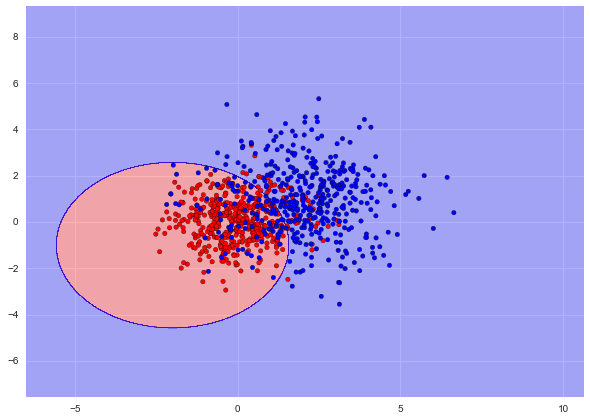

In [5]:
bayes([[0,0],[2,1]], [np.array([[1,0],[0,1]]),np.array([[2,0],[0,2]])], [0.5,0.5])

### d) 
Two classes: 

$μ_0 =(0,0), Σ_0 = \begin{bmatrix}
    1  & 0.5  \\
    0.5 & 1   \\
\end{bmatrix}, μ_1 =(2,1), Σ_1 = \begin{bmatrix}
    1  & 0.5  \\
    0.5 & 1   \\
\end{bmatrix},P(y_0)= 3 \cdot P(y_1)$

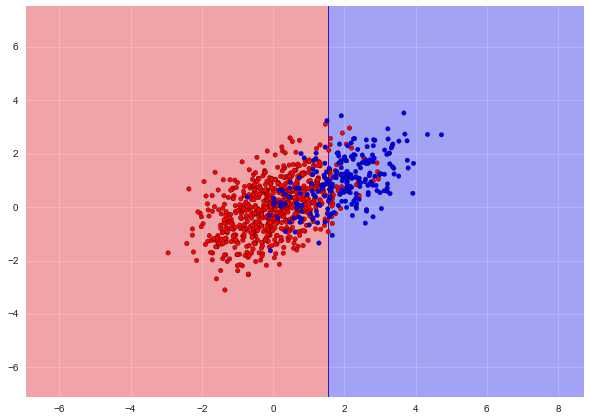

In [6]:
bayes([[0,0],[2,1]], [np.array([[1,0.5],[0.5,1]]),np.array([[1,0.5],[0.5,1]])], [0.75,0.25])

e) Two classes:

$μ_0 =(0,0), Σ_0 = \begin{bmatrix}
    1  & 2  \\
    2 & 1   \\
\end{bmatrix}, μ_1 =(2,1), Σ_1 = \begin{bmatrix}
    1  & 0.5  \\
    0.5 & 1   \\
\end{bmatrix},P(y_0)= P(y_1)$

/Users/Ajit/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


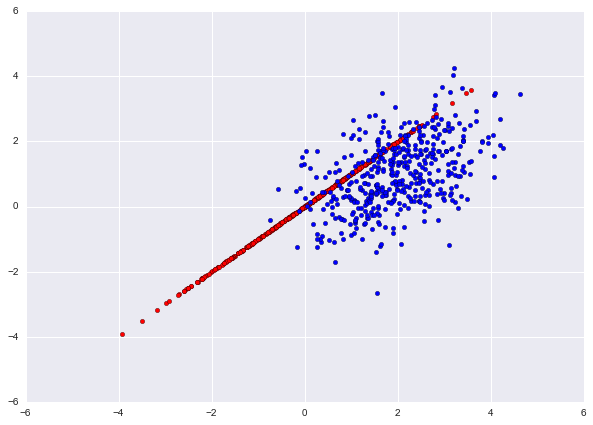

In [7]:
#bayes([[0,0],[2,1]], [np.array([[1,2],[2,1]]),np.array([[1,0.5],[0.5,1]])], [0.5,0.5])
# [[1,2],[2,1]] is not positive-semidefinite
x1 = np.random.multivariate_normal([0,0],np.array([[1,2],[2,1]]), 450)
x2 = np.random.multivariate_normal([2,1],np.array([[1,0.5],[0.5,1]]),450)
plt.figure(figsize=(10,7))
plt.scatter(x1[:,0], x1[:,1],c='red')
plt.scatter(x2[:,0], x2[:,1], c='blue')

f) Two classes:

$μ_0 =(0,0), Σ_0 = \begin{bmatrix}
    4  & 0.5  \\
    0.5 & 1   \\
\end{bmatrix}, μ_1 =(0,0), Σ_1 = \begin{bmatrix}
    1  & 0.5  \\
    0.5 & 4   \\
\end{bmatrix},P(y_0)= P(y_1)$

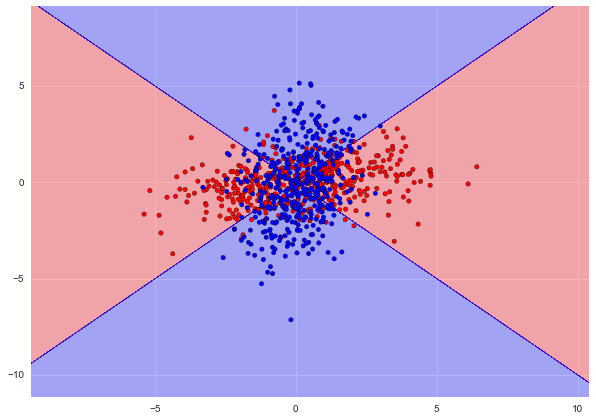

In [10]:
bayes([[0,0],[0,0]], [np.array([[4,0.5],[0.5,1]]),np.array([[1,0.5],[0.5,4]])], [0.5,0.5])

g) Three classes:

$μ_0 =(0,0), Σ_0 = \begin{bmatrix}
    2  & 0.5  \\
    0.5 & 1   \\
\end{bmatrix}, μ_1 =(-2,1), Σ_1 = \begin{bmatrix}
    1  & 0  \\
    0 & 8   \\
\end{bmatrix},\\ μ_2 =(2,-2), Σ_2 = \begin{bmatrix}
    1  & 0.25  \\
    0.25 & 2   \\
\end{bmatrix}, P(y_0)= P(y_1) = P(y_2)$

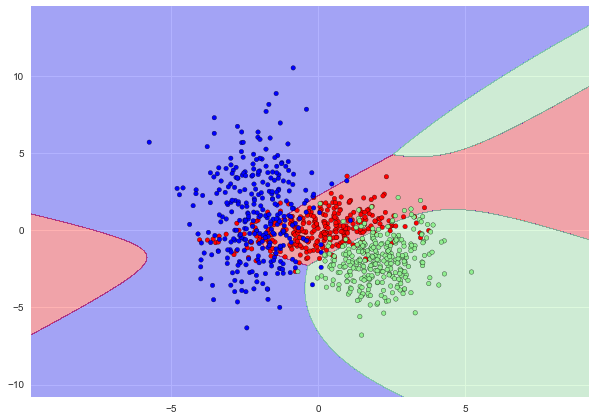

In [9]:
bayes([[0,0],[-2,1],[2,-2]], [np.array([[2,0.5],[0.5,1]]),np.array([[1,0],[0,8]]),np.array([[1,0.25],[0.25,2]])], [1/3,1/3,1/3])